In [1]:
from lib.Locate_ppl import Locate_ppl
from lib.Recognizer import Recognizer
from lib.PersonEmbeding import PersonEmbeding
from lib.EmbedingsManiger import EmbedingsManiger
from matplotlib import pyplot as plt
import torch
lp = Locate_ppl(save_img=True)
pe = PersonEmbeding()
rec = Recognizer("test")
emb_maniger = EmbedingsManiger(cache_ram=True)

Using cache found in C:\Users\gabri/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\gabri/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\gabri/.cache\torch\hub\pytorch_vision_v0.5.0
models/test.ckpt not found ...
Starting with random weights


In [2]:
print(emb_maniger.info)

set()


In [ ]:
#emb_maniger.remove('ArturasRedHoody')

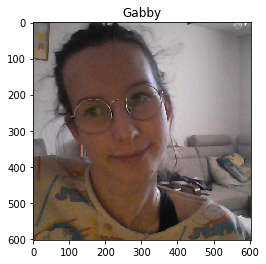

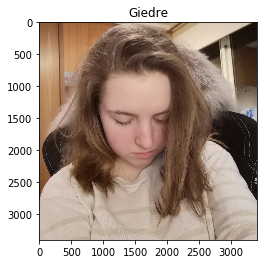

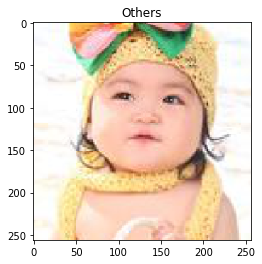

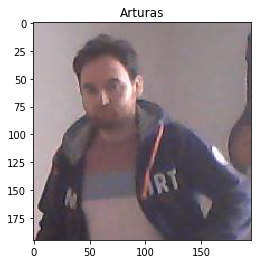

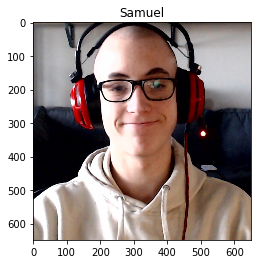

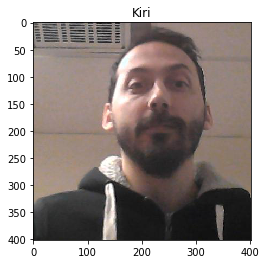

In [14]:
emb_maniger.show_all()


In [ ]:
#emb_maniger.remove("Arturas")

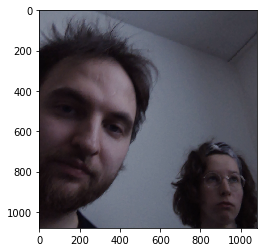

In [3]:
lp.set_path("images")
ppl = lp.snap()

In [ ]:
plt.imshow(ppl[0])
plt.show()

In [ ]:
p = next(iter(ppl))
print(p.shape)
emb = pe.embed(ppl)
print(emb.shape)
r = rec(emb)
print(r)

In [ ]:
a = []

In [ ]:
def get_data(data, it=3):
    c = 0
    for img in lp:
        if len(img)==0:
            continue
        print(c)
        for i in img:
            plt.imshow(i)
            plt.show()
        emb = pe.gen_training_emb(img)
        for e in emb:
            data.append(e)
        c+=1
        if c >= it:
            break

In [ ]:
lp.set_path("images/gabby")
lp.from_disk = False
pe.nb_emb=4
get_data(a, 40)
len(a)

In [ ]:
len(a)

In [ ]:
ppl = lp.snap()

In [ ]:
#emb_maniger.new("Gabby", ppl[0], a)
#emb_maniger.add("Others", b)
emb_maniger.add("Gabby", a)

In [ ]:
for n in emb_maniger.info:
    print(n, emb_maniger.get_len(n))
    

In [ ]:
models = [Recognizer(n, load=False) for n in emb_maniger.info]

In [ ]:
for person in models:
    print(person.name)
    person.get_beter(emb_maniger, 10000)

In [ ]:
from collections import defaultdict
lp.path="images"
#lp.path="images/test"
lp.from_disk=False
for img in lp:
    if len(img) == 0:
        continue
    
    emb = pe.embed(img)
    pred = defaultdict(list)
    for reco in models:
        r = reco(emb)
        for p in r:
            pred[reco.name].append(p[1].item())
    for idx, im in enumerate(img):
        fig, ax = plt.subplots()
        ax.imshow(im)
        textstr = '\n'.join([f"{p}: {v[idx]:.2f}" 
                        for p, v in sorted(pred.items(), reverse=True, key=lambda x: x[1][idx])])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)
    plt.show()

    msg = input("press enter for next:")
    if len(msg) > 1:
        break

In [ ]:
for m in models:
    m.save()